 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
algo_path = Path('../Starter_Code/Resources/algo_returns.csv')
whale_path = Path('../Starter_Code/Resources/whale_returns.csv')
sp500_history_path = Path('../Starter_Code/Resources/sp500_history.csv')

algo_returns_df = pd.read_csv(algo_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
whale_returns_df = pd.read_csv(whale_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
sp500_history_df = pd.read_csv(sp500_history_path, index_col='Date', parse_dates=True, infer_datetime_format=True)



whale_returns_df.head(10)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739
2015-03-11,0.004012,0.005163,0.003312,-0.001147
2015-03-12,0.008265,0.010272,0.013117,0.010801


In [3]:
# Count nulls
whale_returns_df.isnull().sum().sum()

4

In [4]:
sp500_history_df.isnull().sum().sum()

0

In [5]:
# Drop nulls of both whale returns and algo
whale_returns_df = whale_returns_df.dropna().copy()
algo_returns_df = algo_returns_df.dropna().copy()

#check to see if nulls still exist
whale_returns_df.isnull().sum().sum()
algo_returns_df.isnull().sum().sum()
#remove $ symbol from df and change type
sp500_history_df['Close']=sp500_history_df['Close'].str.replace("$","")
sp500_history_df['Close']=sp500_history_df['Close'].astype('float')
sp500_history_df['Close'].dtype



<ipython-input-5-09eddb6c6c8e>:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  sp500_history_df['Close']=sp500_history_df['Close'].str.replace("$","")


dtype('float64')

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [6]:
#calcuate closing prices into daily returns and rename column
sp500_history_df = sp500_history_df.rename(columns={'Close':'S&P 500'})
sp500_daily_returns = sp500_history_df.pct_change()
sp500_daily_returns.head()






,S&P 500
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [7]:
#concatenate
combined_returns_rows = pd.concat([whale_returns_df, algo_returns_df, sp500_daily_returns], axis='rows', join='inner')
combined_returns_columns = pd.concat([whale_returns_df,algo_returns_df, sp500_daily_returns], axis='columns', join='inner')
combined_returns = pd.concat([combined_returns_rows, combined_returns_columns])

In [8]:
# Reading algorithmic returns
combined_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,-0.001011


In [9]:
# Count nulls
combined_returns.isnull().sum()


SOROS FUND MANAGEMENT LLC      3943
PAULSON & CO.INC.              3943
TIGER GLOBAL MANAGEMENT LLC    3943
BERKSHIRE HATHAWAY INC         3943
Algo 1                         3943
Algo 2                         3943
S&P 500                        3944
dtype: int64

In [10]:
# combine dataframes and Drop nulls
combined_returns = combined_returns.dropna().copy()
combined_returns.isnull().sum()




SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
S&P 500                        0
dtype: int64

---

In [11]:
#show compined df
combined_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

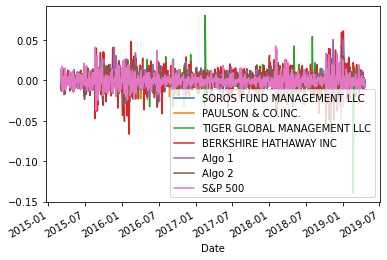

In [12]:
# Plot daily returns of all portfolios
combined_returns.plot()


#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

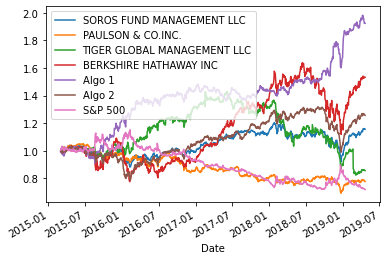

In [13]:
# Calculate cumulative returns of all portfolios
cumultive_returns = (1 + combined_returns).cumprod()
# Plot cumulative returns
cumultive_returns.plot()

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

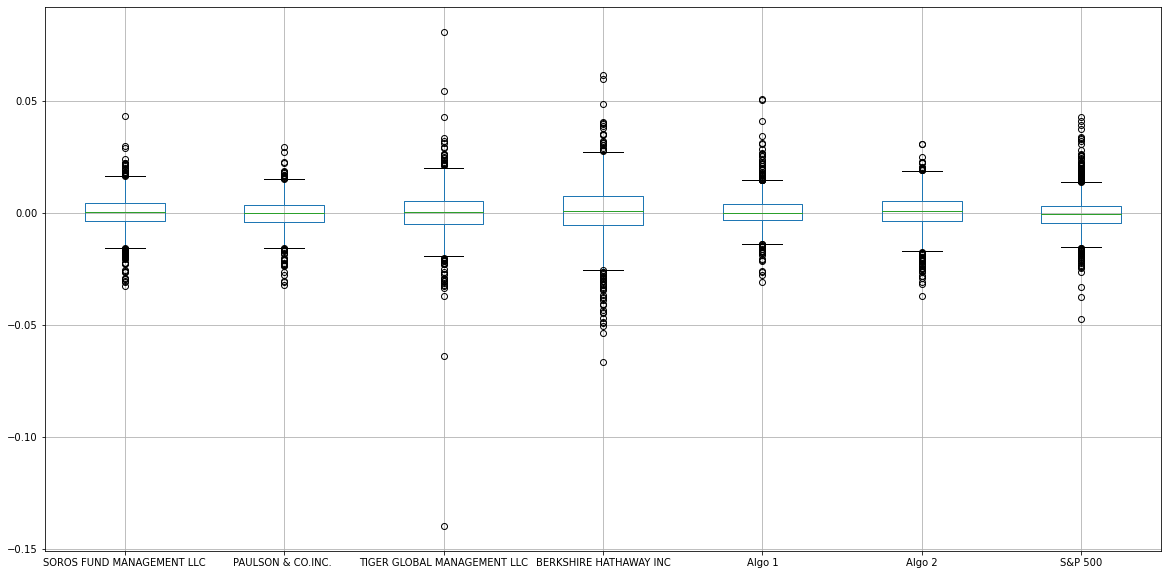

In [14]:
# Box plot to visually show risk
combined_returns.boxplot(figsize=(20, 10))

### Calculate Standard Deviations

In [15]:
# Calculate the daily standard deviations of all portfolios
combined_returns.std()

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
S&P 500                        0.008587
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [16]:
# Calculate  the daily standard deviation of S&P 500
sp500_daily_returns.std()
# Determine which portfolios are riskier than the S&P 500
"Tiger Global Management LLC & Berkshire Hathway Inc have higher risk than S&P 500"

'Tiger Global Management LLC & Berkshire Hathway Inc have higher risk than S&P 500'

### Calculate the Annualized Standard Deviation

In [17]:
# Calculate the annualized standard deviation (252 trading days)
combined_annual = combined_returns.std() * np.sqrt(252)
combined_annual

SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
Algo 2                         0.132413
S&P 500                        0.136313
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

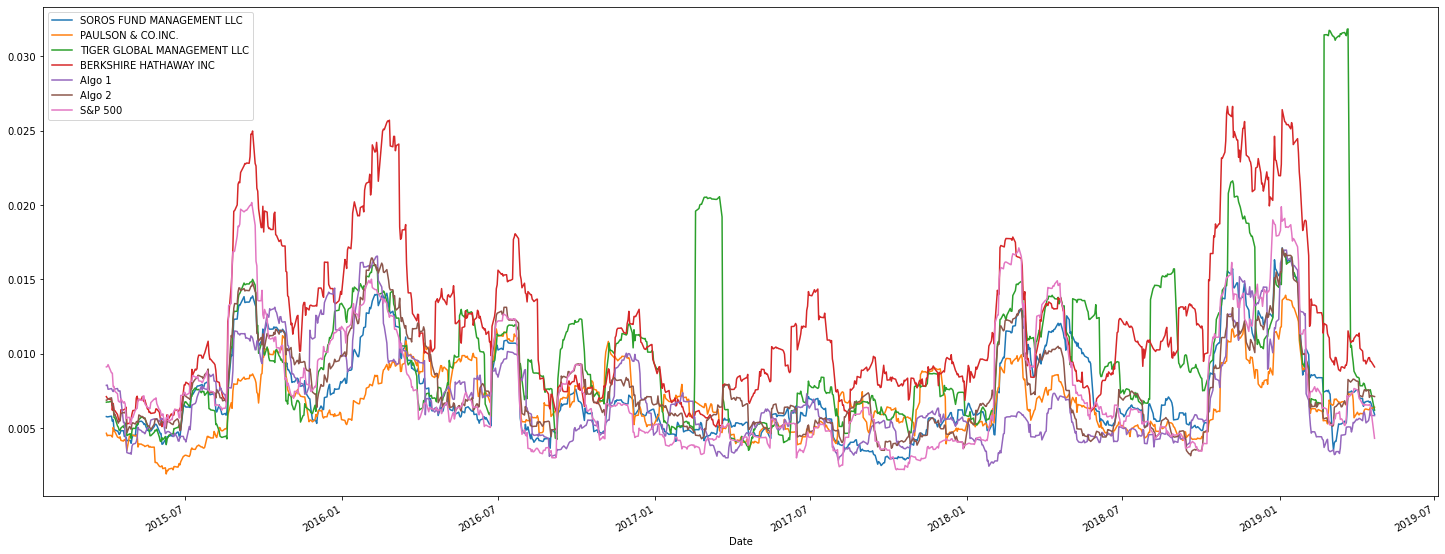

In [18]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_combined_21= combined_returns.rolling(window=21).std()
# Plot the rolling standard deviation
rolling_combined_21.plot(figsize=(25,10))

### Calculate and plot the correlation

<AxesSubplot:>

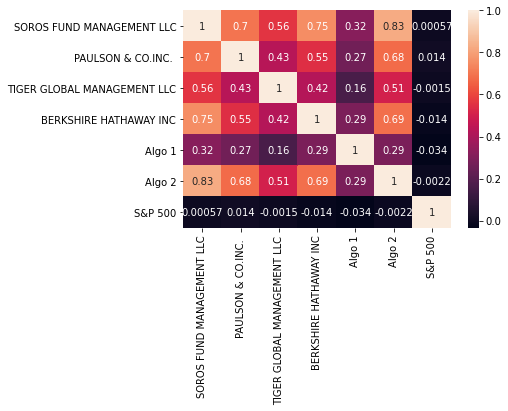

In [19]:
# Calculate the correlation
correlation = combined_returns.corr()

#import seaborn
import seaborn as sns
# Display de correlation matrix
sns.heatmap(correlation, annot=True)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [20]:
# Calculate covariance of a single portfolio
algo_1_covariance = combined_returns['Algo 1'].cov(combined_returns['S&P 500'])
algo_1_covariance

-2.2230425517155125e-06

In [21]:
# Calculate variance of S&P 500
sp500_variance = combined_returns["S&P 500"].var()
sp500_variance

7.373467552840441e-05

In [22]:
# Computing beta. cv/v
algo_1_beta = algo_1_covariance / sp500_variance
algo_1_beta

-0.03014921454233757

<AxesSubplot:xlabel='Date'>

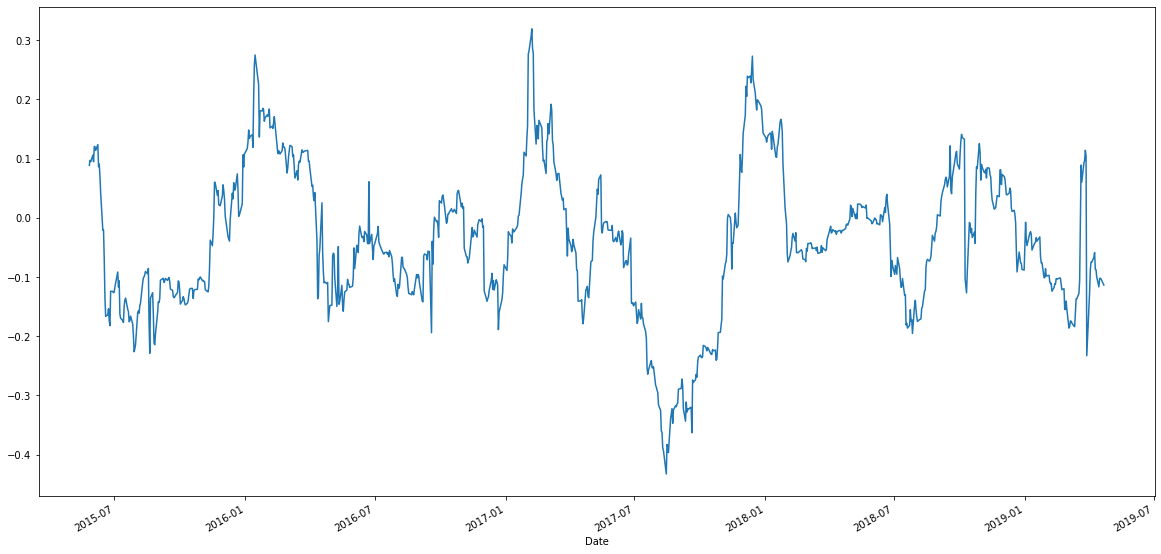

In [23]:
# Plot beta trend
algo_roll_co=combined_returns["Algo 1"].rolling(window=60).cov(combined_returns['S&P 500'])
algo_roll_var= combined_returns['S&P 500'].rolling(window=60).var()
#get beta rolling
rolling_beta = algo_roll_co / algo_roll_var
rolling_beta.plot(figsize=(20,10))


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:xlabel='Date'>

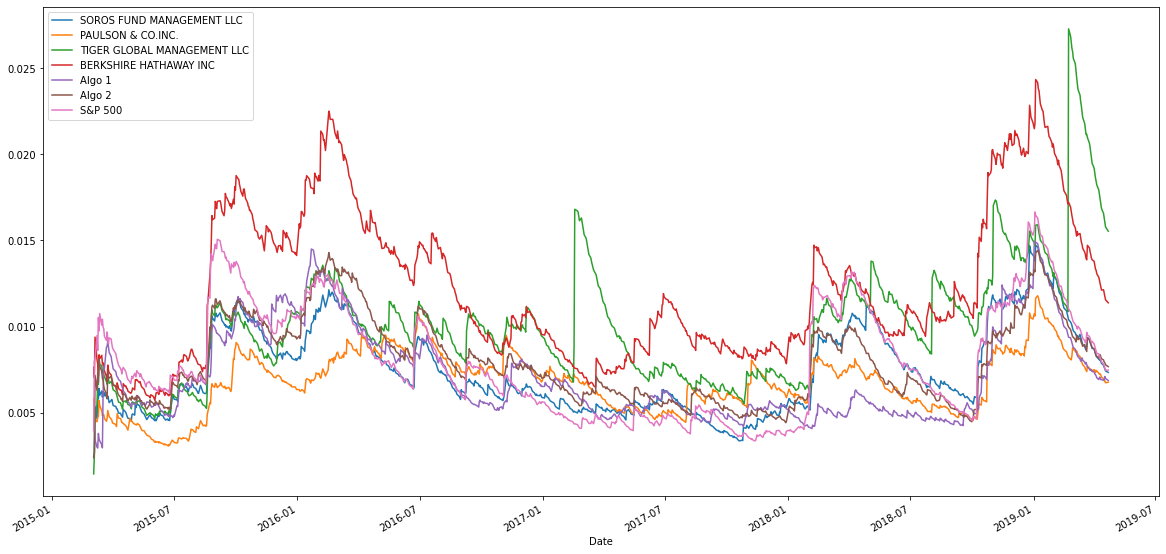

In [24]:
# Use `ewm` to calculate the rolling window
combined_returns.ewm(halflife=21).std().plot(figsize=(20,10))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [25]:
# Annualized Sharpe Ratios
annual_sharpe = (combined_returns.mean() * 252) / (combined_returns.std() * np.sqrt(252))
annual_sharpe

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
S&P 500                       -0.518582
dtype: float64

<AxesSubplot:>

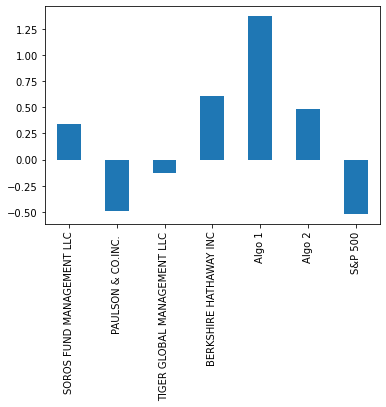

In [26]:
# Visualize the sharpe ratios as a bar plot
annual_sharpe.plot(kind='bar')

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

In [27]:
"in overall the algorithmic strategies outperformed S&P 500 and the whale portfolios"

'in overall the algorithmic strategies outperformed S&P 500 and the whale portfolios'

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [28]:
# Reading data from 1st stock
goog_path = Path('../Starter_Code/Resources/goog_historical.csv')
goog_df = pd.read_csv(goog_path, index_col='Trade DATE', parse_dates=True, infer_datetime_format=True)
goog_df.rename(columns={'Symbol':'GOOG1', 'NOCP':'GOOG'}, inplace=True)
goog_df.drop(columns=['GOOG1'], axis=1, inplace=True)
goog_df.head()

,GOOG
Trade DATE,
2019-05-09,1162.38
2019-05-08,1166.27
2019-05-07,1174.10
2019-05-06,1189.39
2019-05-03,1185.40


In [29]:
# Reading data from 2nd stock
appl_path = Path('../Starter_Code/Resources/aapl_historical.csv')
aapl_df = pd.read_csv(appl_path, index_col='Trade DATE', parse_dates=True, infer_datetime_format=True)
aapl_df.rename(columns={'Symbol':'AAPL1','NOCP':'AAPL'}, inplace=True)
aapl_df.drop(columns=['AAPL1'], axis=1, inplace=True)
aapl_df

,AAPL
Trade DATE,
2019-05-09,200.72
2019-05-08,202.90
2019-05-07,202.86
2019-05-06,208.48
2019-05-03,211.75
...,...
2018-05-17,186.99
2018-05-16,188.18
2018-05-15,186.44


In [30]:
# Reading data from 3rd stock
cost_path = Path('../Starter_Code/Resources/cost_historical.csv')
cost_df = pd.read_csv(cost_path, index_col='Trade DATE', parse_dates=True, infer_datetime_format=True)
cost_df.rename(columns={'Symbol':'COST1','NOCP':'COST'}, inplace=True)
cost_df.drop(columns=['COST1'], axis=1, inplace=True)
cost_df


,COST
Trade DATE,
2019-05-09,243.47
2019-05-08,241.34
2019-05-07,240.18
2019-05-06,244.23
2019-05-03,244.62
...,...
2018-05-17,199.60
2018-05-16,198.71
2018-05-15,195.48


In [31]:
# Combine all stocks in a single DataFrame
combined_df = pd.concat([cost_df, aapl_df, goog_df], axis = 'columns', join='inner')
combined_df.head()

,COST,AAPL,GOOG
Trade DATE,,,
2019-05-09,243.47,200.72,1162.38
2019-05-08,241.34,202.90,1166.27
2019-05-07,240.18,202.86,1174.10
2019-05-06,244.23,208.48,1189.39
2019-05-03,244.62,211.75,1185.40


In [32]:
# Reset Date index
combined_df.sort_index(inplace=True)
combined_df.head()

,COST,AAPL,GOOG
Trade DATE,,,
2018-05-11,195.76,188.59,1098.26
2018-05-14,195.88,188.15,1100.20
2018-05-15,195.48,186.44,1079.23
2018-05-16,198.71,188.18,1081.77
2018-05-17,199.60,186.99,1078.59


In [33]:
# Reorganize portfolio data by having a column per symbol
combined_df

,COST,AAPL,GOOG
Trade DATE,,,
2018-05-11,195.76,188.59,1098.26
2018-05-14,195.88,188.15,1100.20
2018-05-15,195.48,186.44,1079.23
2018-05-16,198.71,188.18,1081.77
2018-05-17,199.60,186.99,1078.59
...,...,...,...
2019-05-03,244.62,211.75,1185.40
2019-05-06,244.23,208.48,1189.39
2019-05-07,240.18,202.86,1174.10


In [34]:
# Calculate daily returns
custom_returns = combined_df.pct_change()
custom_returns.head()

,COST,AAPL,GOOG
Trade DATE,,,
2018-05-11,NaN,NaN,NaN
2018-05-14,0.000613,-0.002333,0.001766
2018-05-15,-0.002042,-0.009088,-0.019060
2018-05-16,0.016523,0.009333,0.002354
2018-05-17,0.004479,-0.006324,-0.002940


In [35]:
# Count NAs
custom_returns.isnull().sum()

COST    1
AAPL    1
GOOG    1
dtype: int64

In [36]:
#Drop NA
custom_returns = custom_returns.dropna().copy()


In [37]:
# Display sample data
custom_returns.head()

,COST,AAPL,GOOG
Trade DATE,,,
2018-05-14,0.000613,-0.002333,0.001766
2018-05-15,-0.002042,-0.009088,-0.019060
2018-05-16,0.016523,0.009333,0.002354
2018-05-17,0.004479,-0.006324,-0.002940
2018-05-18,-0.003206,-0.003637,-0.011339


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [38]:
# Set weights
weights = [1/3, 1/3, 1/3]


In [39]:
# Calculate portfolio return
portfolio_return = custom_returns.dot(weights)

In [40]:
# Display sample data
empty =pd.DataFrame(portfolio_return)
empty.head()

,0
Trade DATE,
2018-05-14,0.000015
2018-05-15,-0.010064
2018-05-16,0.009403
2018-05-17,-0.001595
2018-05-18,-0.006061


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [53]:
# Join your returns DataFrame to the original returns DataFrame
my_port_comb = pd.concat([portfolio_return, combined_returns], axis = 'columns', join = 'inner')
my_port_comb.rename(columns={0:'EMPTY'}, inplace = True)
my_port_comb.dropna(inplace=True)
my_port_comb.sort_index()
my_port_comb.head()

,EMPTY,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
2018-05-14,0.000015,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.006889
2018-05-15,-0.010064,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.004044
2018-05-16,0.009403,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.000857
2018-05-17,-0.001595,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,0.002639
2018-05-18,-0.006061,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.007333


In [54]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
#checked for nulls
my_port_comb.isnull().sum().sum()

0

In [55]:
#show df
my_port_comb.head()

,EMPTY,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
2018-05-14,0.000015,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.006889
2018-05-15,-0.010064,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.004044
2018-05-16,0.009403,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.000857
2018-05-17,-0.001595,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,0.002639
2018-05-18,-0.006061,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.007333


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [56]:
# Calculate the annualized `std`
my_port_comb.std()
ann_var=(my_port_comb.var()*252)
ann_std= np.sqrt(ann_var)
ann_std

EMPTY                          0.211627
SOROS FUND MANAGEMENT LLC      0.146812
PAULSON & CO.INC.              0.116928
TIGER GLOBAL MANAGEMENT LLC    0.232898
BERKSHIRE HATHAWAY INC         0.247305
Algo 1                         0.133927
Algo 2                         0.139499
S&P 500                        0.152469
dtype: float64

### Calculate and plot rolling `std` with 21-day window

In [58]:
# Calculate rolling standard deviation
my_port_comb.rolling(window=21).std().tail()

,EMPTY,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
2019-04-15,0.007588,0.006804,0.006225,0.007525,0.009729,0.005496,0.007572,0.006532
2019-04-16,0.007507,0.006711,0.006224,0.007532,0.009731,0.005760,0.007053,0.006571
2019-04-17,0.007668,0.006773,0.006370,0.007574,0.009485,0.006229,0.007165,0.006505
2019-04-18,0.007482,0.006633,0.006303,0.007328,0.009475,0.005834,0.007172,0.006137
2019-04-22,0.006539,0.005915,0.006400,0.006197,0.009104,0.005831,0.007113,0.004302


<AxesSubplot:>

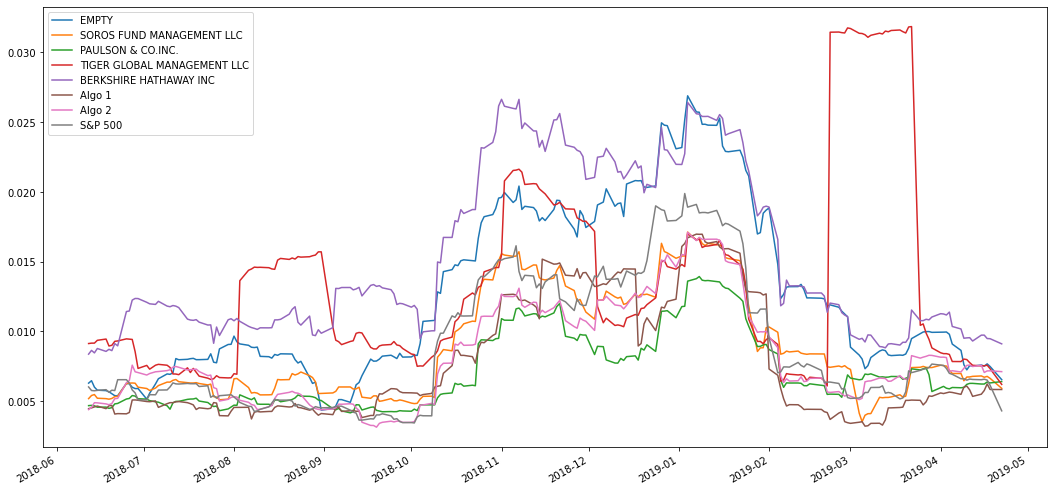

In [60]:
# Plot rolling standard deviation
my_port_comb.rolling(window=21).std().plot(figsize=(18,9))

### Calculate and plot the correlation

In [62]:
# Calculate and plot the correlation
my_correlation = my_port_comb.corr()
my_correlation

,EMPTY,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
EMPTY,1.000000,0.732548,0.643828,0.390961,0.800558,0.260331,0.739020,0.005603
SOROS FUND MANAGEMENT LLC,0.732548,1.000000,0.791802,0.477844,0.816197,0.336909,0.862583,-0.028256
PAULSON & CO.INC.,0.643828,0.791802,1.000000,0.484869,0.650390,0.360727,0.783865,-0.059862
TIGER GLOBAL MANAGEMENT LLC,0.390961,0.477844,0.484869,1.000000,0.324306,0.113671,0.408402,0.005881
BERKSHIRE HATHAWAY INC,0.800558,0.816197,0.650390,0.324306,1.000000,0.325985,0.782054,-0.038832
Algo 1,0.260331,0.336909,0.360727,0.113671,0.325985,1.000000,0.364457,-0.054478
Algo 2,0.739020,0.862583,0.783865,0.408402,0.782054,0.364457,1.000000,-0.042540
S&P 500,0.005603,-0.028256,-0.059862,0.005881,-0.038832,-0.054478,-0.042540,1.000000


<AxesSubplot:>

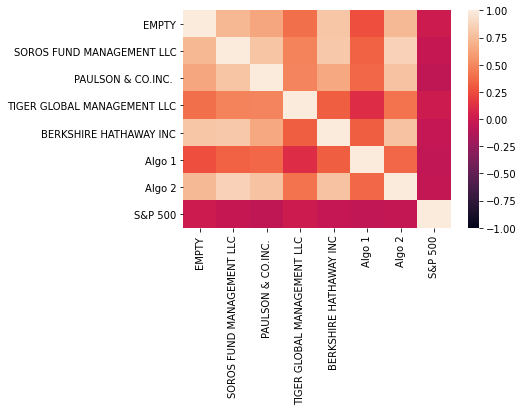

In [63]:
sns.heatmap(my_correlation, vmin= -1, vmax = 1)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [49]:
#GOT LOST HERE!

<AxesSubplot:>

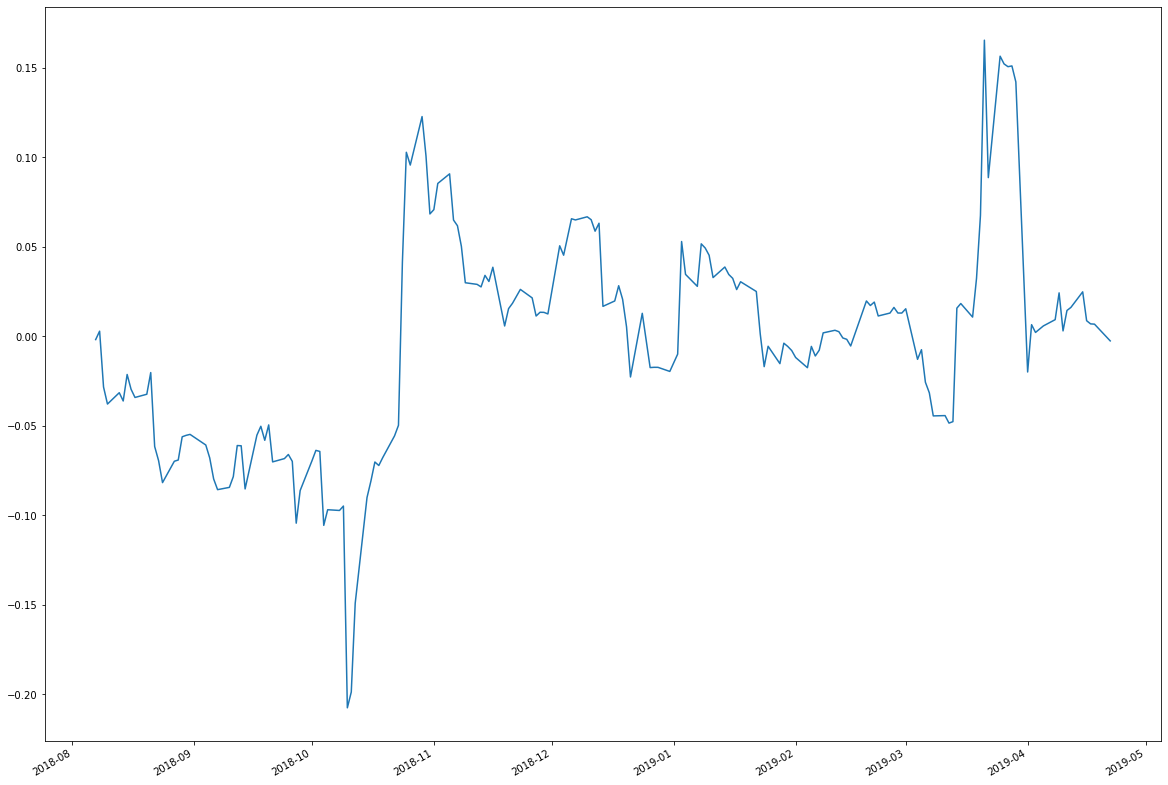

In [64]:
# Calculate and plot Beta
rolvar = my_port_comb['EMPTY'].rolling(window=60).var()
rolcovar = my_port_comb['EMPTY'].rolling(window=60).cov(my_port_comb['S&P 500'])
rolbeta = rolcovar / rolvar
rolbeta.plot(figsize=(20,15))

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [65]:
# Calculate Annualzied Sharpe Ratios
my_sharpe = (my_port_comb.mean() * 252) / ((my_port_comb).std() * np.sqrt(252))
my_sharpe

EMPTY                          0.876152
SOROS FUND MANAGEMENT LLC      0.380007
PAULSON & CO.INC.              0.227577
TIGER GLOBAL MANAGEMENT LLC   -1.066635
BERKSHIRE HATHAWAY INC         0.103006
Algo 1                         2.001260
Algo 2                         0.007334
S&P 500                       -0.427676
dtype: float64

<AxesSubplot:>

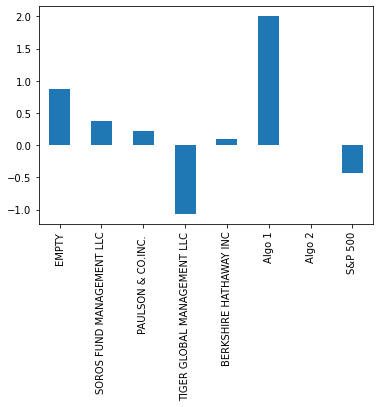

In [66]:
# Visualize the sharpe ratios as a bar plot
my_sharpe.plot(kind='bar')

### How does your portfolio do?

Write your answer here!

In [ ]:
"My Portfolio placed 2nd to best against the Algo 1 portfolio"